In [1]:
import click
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import pandas as pd
import os
import shutil
import joblib
import json
from shutil import copytree

In [2]:
def main(path):
    splitsort = []
    smaller = []
    
    for i in sorted(glob(os.path.join(path, '*log.csv'))):
        splitname = os.path.basename(i).split('_')
        if len(splitname)==3 and int(splitname[0])!=0:
            splitsort.append((int(splitname[0]),i))
        elif len(splitname)==2:
            smaller.append(i)
    
    if len(splitsort)!=0:
        dirs = list(np.array(sorted(splitsort))[:,1]) + smaller
    else:
        dirs = smaller
    loss = []
    for i in dirs:
        # print(f"Processing file: {i}")
        # print(i)
        loss.append(split(i))  # Get only the loss values (assumed to be in the second column)

    
    plt.plot(*np.vstack(loss).T)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    # plt.show()
    return np.max(np.vstack(loss)[:,0]).astype(int)

def split(path):
    """Helper function to read CSV file and extract required columns."""
    with open(path, 'r') as f:
        save = pd.read_csv(path)[['Iteration','Cost']].dropna()
    return save.values

In [3]:
datatime = pd.Timedelta(0)  # Initialize as Timedelta
itercost = []
statsdf = []
files = glob('../Pennylane_to_Qiskit/real_qiskit_class/*csv')
# Loop over files and return the total wall time and number of iterations ran
for idx, i in enumerate(files):
    df1 = pd.read_csv(i).dropna().drop(columns=['Parameters'])
    df = pd.to_datetime(df1["Time"], format="%a %b %d %H:%M:%S %Y")
    
    datatime+=df.iloc[-1] - df.iloc[0] 
    itercost.append((df1[['Iteration','Cost']]))
    if idx==len(files)-1:
        maxiter = int(df1['Iteration'].values[-1])
    statsdf.append(df.diff().mean())
# Drop NaT values
time_deltas_clean = pd.Series(statsdf).dropna()

# Compute statistics
min_time = time_deltas_clean.min()
mean_time = time_deltas_clean.mean()
max_time = time_deltas_clean.max()
median_time = time_deltas_clean.median()        
data = pd.DataFrame.from_dict({"Num_iter":maxiter,'Total Walltime':datatime,"min_time":min_time,"mean_time":mean_time,"max_time":max_time,"median_time":median_time},orient="index")

In [4]:
(mean_time*40)*1000

Timedelta('160 days 18:48:44.670080')

In [5]:
time_deltas_clean

0   0 days 00:02:34.888888888
1   0 days 00:03:15.426966292
2   0 days 00:03:15.935871743
3   0 days 00:12:38.330645161
4   0 days 00:07:11.883211678
dtype: timedelta64[ns]

In [6]:
159 /4

39.75

In [7]:
39 * 4

156

In [8]:
data

,0
Num_iter,275
Total Walltime,3 days 19:22:08
min_time,0 days 00:02:34.888888888
mean_time,0 days 00:05:47.293116752
max_time,0 days 00:12:38.330645161
median_time,0 days 00:03:15.935871743


In [9]:
len(glob('../BSE-calc-test/16qubit/*/*results.json'))

167

In [10]:
for i in glob('../BSE-calc-test/5qubit/*/*results.json'):
    name = os.path.basename(os.path.dirname(i)) 
    if os.path.exists(f"../BSE-calc-test/16qubit/{name}")==False:
        print(name)

A1-A1-CNOT_Full-CRX


In [11]:
len(set(list(map(os.path.basename,map(os.path.dirname,glob(os.path.join('../BSE-calc-test/16qubit/','*/'))))))&set(list(map(os.path.basename,map(os.path.dirname,glob(os.path.join('../BSE-calc-test/5qubit/','*/')))))))

169

In [12]:
len(glob(os.path.join('../BSE-calc-test/16qubit/','*/')))

174

../BSE-calc-test/16qubit/A1-A1-CNOT_Full-CRX/ 248



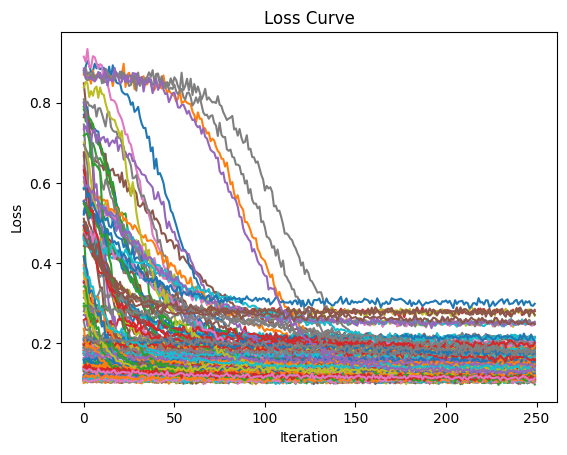

In [15]:


for i in glob(os.path.join('../BSE-calc-test/16qubit/','*/')):
    try:
        iters = main(i)
        if iters!=249:
            print(i,iters)    
    except:
        print('BROKE:',i)
print()

In [ ]:

for all_dir in ['../BSE-calc-test/5qubit/', '../BSE-calc-test/16qubit/', '../qml_DDCC/5/']:
    for i in glob(os.path.join(all_dir,'*/')):
        try:
            iters = main(i)
            if iters!=999:
                print(i,iters)    
        except:
            print('BROKE:',i)
    print()

In [ ]:
'/Users/grierjones/qregress/qml_DDCC/learning_curves/*'

In [ ]:
rerun = []
# for i in glob('qml_DDCC/5/*/*_results.json'):
# for i in glob(os.path.join(os.path.expanduser('~'),'qregress/qml_DDCC/RUD_AL/*/A2_HWE-CNOT')):
for i in glob(os.path.join(os.path.expanduser('~'),'qregress/qml_DDCC/learning_curves/*/A2_HWE-CNOT')):
# for i in glob(os.path.join(os.path.expanduser('~'),"rerun_BSE/5")+"/*/model_log.csv"):
# for i in glob('function-calc-test/sixteenqubit_test/quad16qubit/*/*model_log.csv'):
    iters = main(i)
    if iters!=999:
        print(i,iters)
    #     rerun.append((os.path.dirname(i),1000-iters))
    


In [ ]:
# rerun = []
# for i in glob('BSE-calc-test/16qubit/*/*results.json'):
# # for i in glob('function-calc-test/sixteenqubit_test/quad16qubit//*/model_log.csv'):
#     iters = main(os.path.dirname(i))
#     if iters!=1000:
#         # print(i,iters)
#         rerun.append((os.path.dirname(i),1000-iters))
#     # print(iters)

# rerundir = os.path.join(os.path.expanduser('~'),'rerun_BSE/16/')
# for p,iters in rerun:
#     copytree(p,os.path.join(rerundir,os.path.basename(p)))
#     filename = os.path.join(rerundir,os.path.basename(p),os.path.basename(p)+'.json')
    
#     with open(filename,'r') as f:
#         file = json.load(f)
#     file['MAX_ITER']=iters 
    
#     with open(filename,'w') as g:
#         json.dump(file,g)

In [ ]:
stacked_log=[]
for idx,i in enumerate(glob('BSE-calc-test/16qubit/*/model_log.csv')):
# for idx,i in enumerate(sorted(glob('function-calc-test/fivequbit_tests/sin5qubit/*/model_log.csv'))):
# for i in glob('function-calc-test/sixteenqubit_test/lin16qubit/*/model_log.csv'):    
    df=pd.read_csv(i)[['Iteration','Cost']].dropna()
    if df.shape[0]!=1000:
        print(i,idx,df.shape[0])
        stacked_log.append(df)    
        sns.lineplot(data=df,x='Iteration',y='Cost')
# plt.xlim(0,1000)
plt.show()
# for i in glob('BSE_RUD_AL_test/16qubit/5_RUD/*/model_log.csv'):
#     df=pd.read_csv(i)[['Iteration','Cost']].dropna()
#     stacked_log.append(df)

In [ ]:
def main(path):

    with open(path,'r') as f:
        filename=f.readlines()
    
    save=[]
    for i in filename:
        if ':' in i:
            splitf=i.split(',')
            save.append((splitf[1],splitf[2]))
    
    save=np.array(save).astype(float)
    
    plt.plot(save[:,0],save[:,1])
    plt.show()
